In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:
df.shape


(2823, 25)

In [6]:
df.drop(['ADDRESSLINE1',"ADDRESSLINE2","STATE","TERRITORY",
"CONTACTFIRSTNAME", "CONTACTLASTNAME", "QTR_ID", "CUSTOMERNAME"], axis
= 1,inplace = True)


In [7]:
df.drop(['PHONE', 'YEAR_ID', 'ORDERDATE'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   STATUS           2823 non-null   object 
 6   MONTH_ID         2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  POSTALCODE       2747 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 308.9+ KB


In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,7.092455,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,3.656633,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,4.000000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,8.000000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,11.000000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,12.000000,214.000000


In [9]:
df.drop('ORDERNUMBER', inplace = True, axis = 1)
df.describe()


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,7.092455,100.715551
std,9.741443,20.174277,4.225841,1841.865106,3.656633,40.187912
min,6.000000,26.880000,1.000000,482.130000,1.000000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,4.000000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,8.000000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,11.000000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,12.000000,214.000000


In [10]:
df.shape

(2823, 13)

In [11]:
cat_list = df.select_dtypes(include=object).columns.to_list()
cat_list

['STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CITY',
 'POSTALCODE',
 'COUNTRY',
 'DEALSIZE']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cat_list].nunique()

STATUS           6
PRODUCTLINE      7
PRODUCTCODE    109
CITY            73
POSTALCODE      73
COUNTRY         19
DEALSIZE         3
dtype: int64

In [13]:
for i in cat_list:
     df[i] = le.fit_transform(df[i])
X = df[['SALES','PRODUCTCODE']]

In [14]:
X.head()


,SALES,PRODUCTCODE
0,2871.00,0
1,2765.90,0
2,3884.34,0
3,3746.70,0
4,5205.27,0


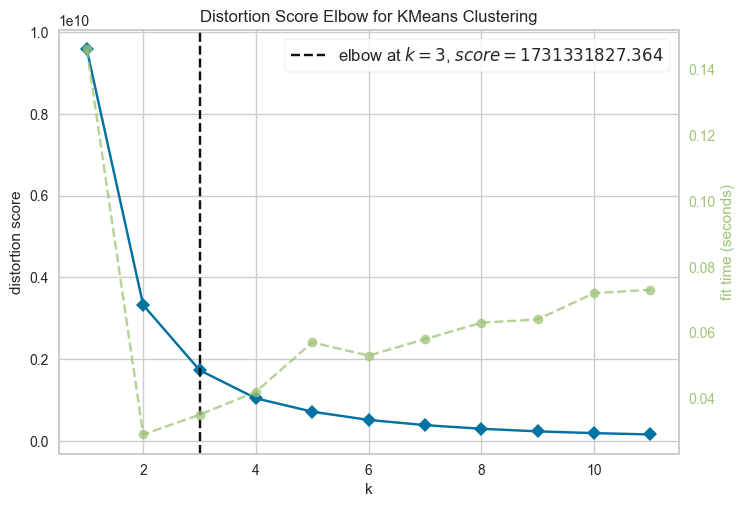

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning,
module='sklearn.cluster._kmeans')
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visualizer = KElbowVisualizer(KMeans(), k = (1,12)).fit(X)
visualizer.show()


In [19]:
kmeans_model = KMeans(n_clusters = 3, init = "k-means++").fit(X)
kmeans_model.labels_



array([1, 1, 0, ..., 0, 1, 1])

In [20]:
kmeans_model.cluster_centers_


array([[4144.69175162,   50.36144578],
       [2127.79514577,   62.48906706],
       [7099.92341398,   31.52419355]])

In [21]:
from collections import Counter
Counter(kmeans_model.labels_)

Counter({1: 1368, 0: 1082, 2: 373})

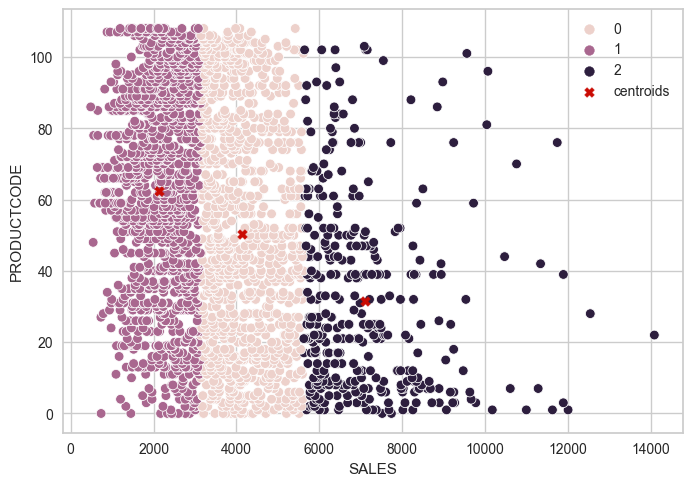

In [22]:
sns.scatterplot(data = X, x = 'SALES', y = 'PRODUCTCODE',hue =
kmeans_model.labels_)
plt.scatter(kmeans_model.cluster_centers_[:,0],
kmeans_model.cluster_centers_[:,1],c = "r", label = "centroids",
marker = "X")
plt.legend()
plt.show()